In [2]:
generate_simulated_data <- function(feature_size = "low", data_size = "small", sparsity_level = "low", seed = 123) {
  set.seed(seed)

  # Define the ranges for feature size, data size, and sparsity
  feature_size_map <- list("low" = 50, "medium" = 500, "high" = 1500)
  data_size_map <- list("small" = 500, "medium" = 5000, "large" = 50000, "very_large" = 200000)
  sparsity_map <- list("low" = 0.3, "medium" = 0.65, "high" = 0.9)  # Sparsity as zero proportion

  # Validate inputs
  if (!(feature_size %in% names(feature_size_map))) {
    stop("Invalid feature_size. Must be one of: low, medium, high.")
  }
  if (!(data_size %in% names(data_size_map))) {
    stop("Invalid data_size. Must be one of: small, medium, large, very_large.")
  }
  if (!(sparsity_level %in% names(sparsity_map))) {
    stop("Invalid sparsity_level. Must be one of: low, medium, high.")
  }

  # Get the number of features and samples
  p <- feature_size_map[[feature_size]]
  n <- data_size_map[[data_size]]

  # Sparsity level (proportion of zero elements in X)
  sparsity <- sparsity_map[[sparsity_level]]

  # Generate the feature matrix (X) with the specified sparsity
  X <- matrix(0, nrow = n, ncol = p)  # Initialize with zeros
  num_non_zero <- round((1 - sparsity) * n * p)  # Total non-zero elements
  non_zero_indices <- sample(1:(n * p), size = num_non_zero, replace = FALSE)
  X[non_zero_indices] <- rnorm(num_non_zero)  # Fill non-zero entries with random values

  # Generate the true coefficients (beta)
  beta <- rep(0, p)
  num_non_zero_beta <- max(1, round(0.1 * p))  # Assume 10% of beta are non-zero
  non_zero_beta_indices <- sample(1:p, size = num_non_zero_beta, replace = FALSE)
  beta[non_zero_beta_indices] <- runif(length(non_zero_beta_indices), min = -1, max = 1)

  # Generate the response vector (y) with some noise
  y <- X %*% beta + rnorm(n)

  # Return the generated data
  return(list(X = X, y = y, beta = beta))
}

# Example usage
# data <- generate_simulated_data(feature_size = "medium", data_size = "small", sparsity_level = "medium", seed = 123)
# X <- data$X
# y <- data$y
# beta <- data$beta

# Calculate sparsity level of X
# calculate_sparsity <- function(data) {
#   total_elements <- length(data)
#   non_zero_elements <- sum(data != 0)
#   sparsity <- 1 - (non_zero_elements / total_elements)
#   return(sparsity)
# }
# print(calculate_sparsity(data$X))



In [3]:
# Generate datasets for specific cases

# feature_size:low
data_low_small_low <- generate_simulated_data(feature_size = "low", data_size = "small", sparsity_level = "low")
data_low_small_medium <- generate_simulated_data(feature_size = "low", data_size = "small", sparsity_level = "medium")
data_low_small_high <- generate_simulated_data(feature_size = "low", data_size = "small", sparsity_level = "high")

# data_low_medium_low <- generate_simulated_data(feature_size = "low", data_size = "medium", sparsity_level = "low")
# data_low_medium_medium <- generate_simulated_data(feature_size = "low", data_size = "medium", sparsity_level = "medium")
# data_low_medium_high <- generate_simulated_data(feature_size = "low", data_size = "medium", sparsity_level = "high")

# data_low_large_low <- generate_simulated_data(feature_size = "low", data_size = "large", sparsity_level = "low")
# data_low_large_medium <- generate_simulated_data(feature_size = "low", data_size = "large", sparsity_level = "medium")
# data_low_large_high <- generate_simulated_data(feature_size = "low", data_size = "large", sparsity_level = "high")

# data_low_vlarge_low <- generate_simulated_data(feature_size = "low", data_size = "very_large", sparsity_level = "low")
# data_low_vlarge_medium <- generate_simulated_data(feature_size = "low", data_size = "very_large", sparsity_level = "medium")
# data_low_vlarge_high <- generate_simulated_data(feature_size = "low", data_size = "very_large", sparsity_level = "high")


# # feature_size:medium
# data_medium_small_low <- generate_simulated_data(feature_size = "medium", data_size = "small", sparsity_level = "low")
# data_medium_small_medium <- generate_simulated_data(feature_size = "medium", data_size = "small", sparsity_level = "medium")
# data_medium_small_high <- generate_simulated_data(feature_size = "medium", data_size = "small", sparsity_level = "high")

# data_medium_medium_low <- generate_simulated_data(feature_size = "medium", data_size = "medium", sparsity_level = "low")
# data_medium_medium_medium <- generate_simulated_data(feature_size = "medium", data_size = "medium", sparsity_level = "medium")
# data_medium_medium_high <- generate_simulated_data(feature_size = "medium", data_size = "medium", sparsity_level = "high")

# data_medium_large_low <- generate_simulated_data(feature_size = "medium", data_size = "large", sparsity_level = "low")
# data_medium_large_medium <- generate_simulated_data(feature_size = "medium", data_size = "large", sparsity_level = "medium")
# data_medium_large_high <- generate_simulated_data(feature_size = "medium", data_size = "large", sparsity_level = "high")

# data_medium_vlarge_low <- generate_simulated_data(feature_size = "medium", data_size = "very_large", sparsity_level = "low")
# data_medium_vlarge_medium <- generate_simulated_data(feature_size = "medium", data_size = "very_large", sparsity_level = "medium")
# data_medium_vlarge_high <- generate_simulated_data(feature_size = "medium", data_size = "very_large", sparsity_level = "high")

# # feature_size:high
# data_high_small_low <- generate_simulated_data(feature_size = "high", data_size = "small", sparsity_level = "low")
# data_high_small_medium <- generate_simulated_data(feature_size = "high", data_size = "small", sparsity_level = "medium")
# data_high_small_high <- generate_simulated_data(feature_size = "high", data_size = "small", sparsity_level = "high")

# data_high_medium_low <- generate_simulated_data(feature_size = "high", data_size = "medium", sparsity_level = "low")
# data_high_medium_medium <- generate_simulated_data(feature_size = "high", data_size = "medium", sparsity_level = "medium")
# data_high_medium_high <- generate_simulated_data(feature_size = "high", data_size = "medium", sparsity_level = "high")

# data_high_large_low <- generate_simulated_data(feature_size = "high", data_size = "large", sparsity_level = "low")
# data_high_large_medium <- generate_simulated_data(feature_size = "high", data_size = "large", sparsity_level = "medium")
# data_high_large_high <- generate_simulated_data(feature_size = "high", data_size = "large", sparsity_level = "high")

# data_high_vlarge_low <- generate_simulated_data(feature_size = "high", data_size = "very_large", sparsity_level = "low")
# data_high_vlarge_medium <- generate_simulated_data(feature_size = "high", data_size = "very_large", sparsity_level = "medium")
# data_high_vlarge_high <- generate_simulated_data(feature_size = "high", data_size = "very_large", sparsity_level = "high")


In [4]:
# library(glmnet)

compare_lasso_methods <- function(X, y, lambda) {
  methods <- c("auto", "CGDA", "ISTA", "FISTA", "LARS", "PFA", "SLA")

  results <- list()

  for (method in methods) {
    cat("\nRunning robust_lasso with method:", method, "\n")

    # Measure system time for robust_lasso
    robust_time <- system.time(
      robust_result <- robust_lasso(X, y, lambda, method = method)
    )
    # print(robust_result$method,robust_result$fit$iter,robust_result$fit$convergence)
    print(robust_result$method)

    # Extract predictions and residuals from robust_lasso
    robust_beta <- robust_result$fit$beta
    y_pred_robust <- cbind(1, X) %*% robust_beta  # Include intercept
    residuals_robust <- y - y_pred_robust

    # Calculate metrics for robust_lasso
    mse_robust <- mean(residuals_robust^2)
    r2_robust <- 1 - sum(residuals_robust^2) / sum((y - mean(y))^2)

    # Store results for robust_lasso
    results[[method]] <- list(
      time = robust_time["elapsed"],
      mse = mse_robust,
      r2 = r2_robust
    )

    # Plot residuals for robust_lasso
    plot(y_pred_robust, residuals_robust,
         main = paste("Residual Plot for robust_lasso (", method, ")"),
         xlab = "Predicted Values", ylab = "Residuals",
         col = "blue", pch = 20)
    abline(h = 0, col = "red", lty = 2)
  }

  # Run glmnet
  cat("\nRunning glmnet\n")
  glmnet_time <- system.time(
    glmnet_result <- glmnet(X, y, alpha = 1, lambda = lambda, intercept = TRUE)
  )

  # Extract predictions and residuals from glmnet
  glmnet_beta <- as.vector(coef(glmnet_result, s = lambda))
  y_pred_glmnet <- cbind(1, X) %*% glmnet_beta  # Include intercept
  residuals_glmnet <- y - y_pred_glmnet

  # Calculate metrics for glmnet
  mse_glmnet <- mean(residuals_glmnet^2)
  r2_glmnet <- 1 - sum(residuals_glmnet^2) / sum((y - mean(y))^2)

  # Store results for glmnet
  results[["glmnet"]] <- list(
    time = glmnet_time["elapsed"],
    mse = mse_glmnet,
    r2 = r2_glmnet
  )

  # Plot residuals for glmnet
  plot(y_pred_glmnet, residuals_glmnet,
       main = "Residual Plot for glmnet",
       xlab = "Predicted Values", ylab = "Residuals",
       col = "green", pch = 20)
  abline(h = 0, col = "red", lty = 2)

  # Print and return results
  print(results)
  return(results)
}

# # Example usage
# # Simulated data
# set.seed(123)
# n <- 100
# p <- 10
# X <- matrix(rnorm(n * p), nrow = n, ncol = p)
# beta_true <- c(1, -1, rep(0, p - 2))
# y <- X %*% beta_true + rnorm(n)
# lambda <- 0.1




In [13]:
source("../R/robust_lasso.R")

In [8]:
library(glmnet)

Loading required package: Matrix

Loaded glmnet 4.1-8



In [11]:
robust_lasso(X = data_low_small_high$X, y = data_low_small_high$y, lambda = 0.1, method = "auto")

$method
[1] "LARS"

$fit
$fit$beta
 [1] -0.065727134  0.124477926  0.032664102 -0.223907688  0.002591237
 [6] -0.025417945  0.504468510  0.065110048  0.320730050  0.037257645
[11] -0.062073541 -0.047573492 -0.058108352  0.051502722  0.196052489
[16] -0.496123592  0.032596819  0.038760928  0.137171186  0.123780460
[21]  0.048823054 -0.012456488 -0.076530707  0.003949205  0.274546530
[26] -0.159565732  0.122119115 -0.216790506  0.574134421 -0.168329686
[31]  0.064681363  0.100444701 -0.061568735  0.124141579  0.239208136
[36]  0.089216082 -0.010908973  0.042514061 -0.087068541 -0.132433371
[41] -0.275797532 -0.152593983  0.052292662  0.122444366  0.072130170
[46]  0.186299594 -0.259198569 -0.175186392 -0.216614975  0.302074317
[51]  0.081473694

$fit$iterations
[1] 50

$fit$convergence
[1] TRUE


Running robust_lasso with method: auto 
[1] "ISTA"

Running robust_lasso with method: CGDA 
[1] "CGDA"


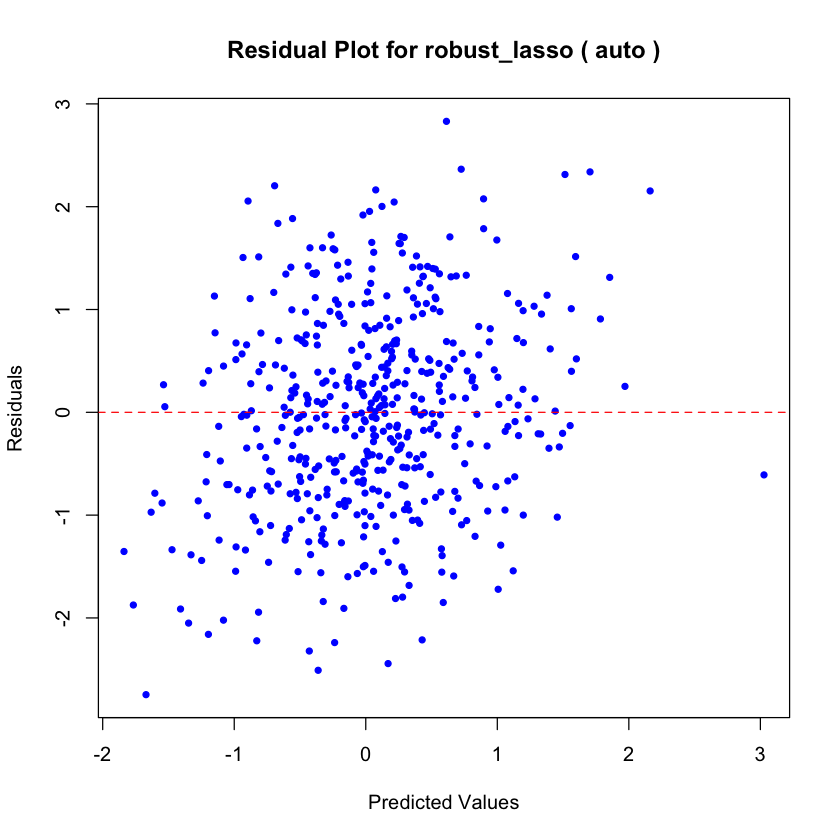


Running robust_lasso with method: ISTA 
[1] "ISTA"


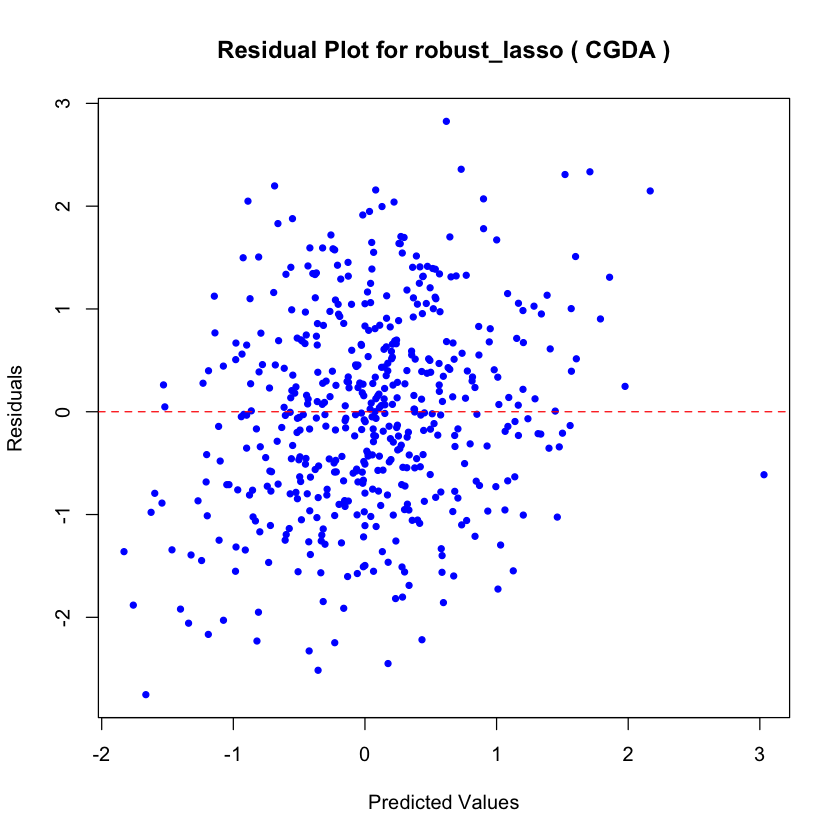


Running robust_lasso with method: FISTA 
[1] "FISTA"


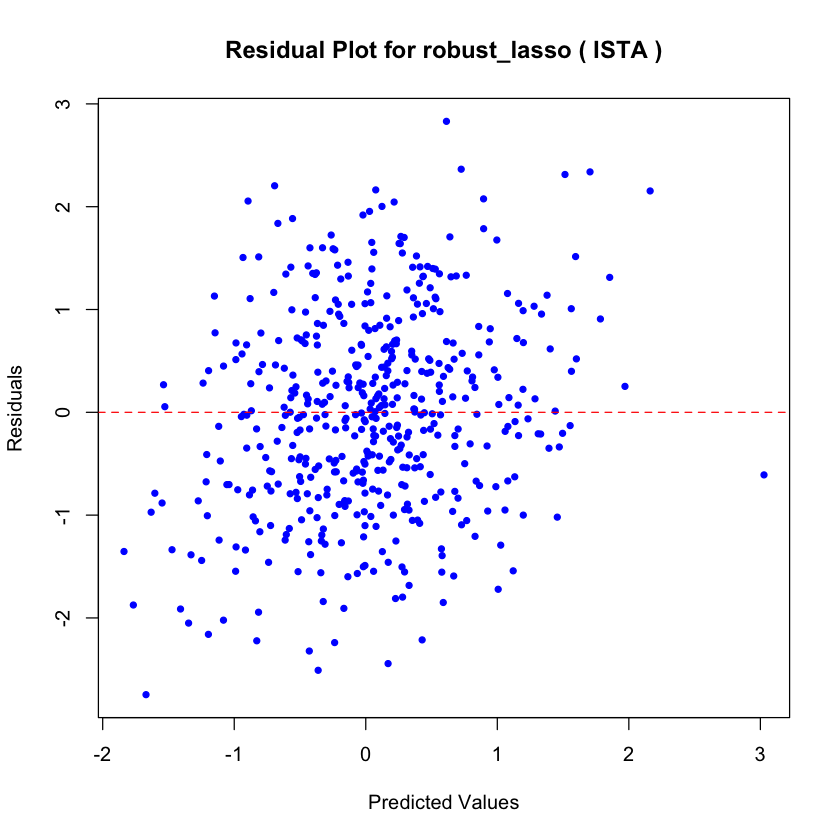


Running robust_lasso with method: LARS 
[1] "LARS"


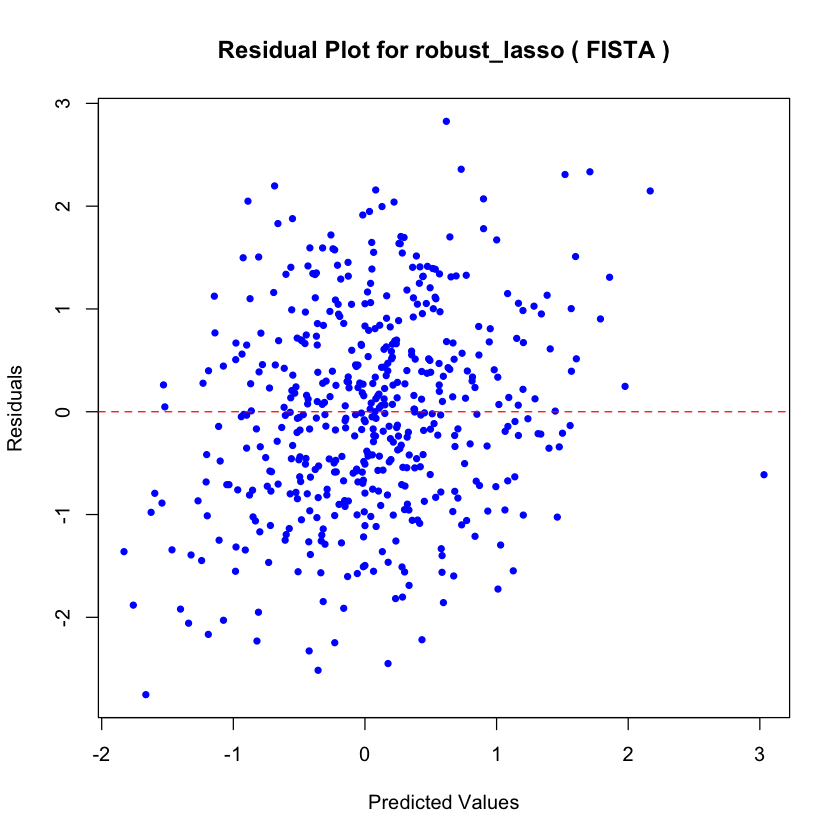


Running robust_lasso with method: PFA 
[1] "PFA"


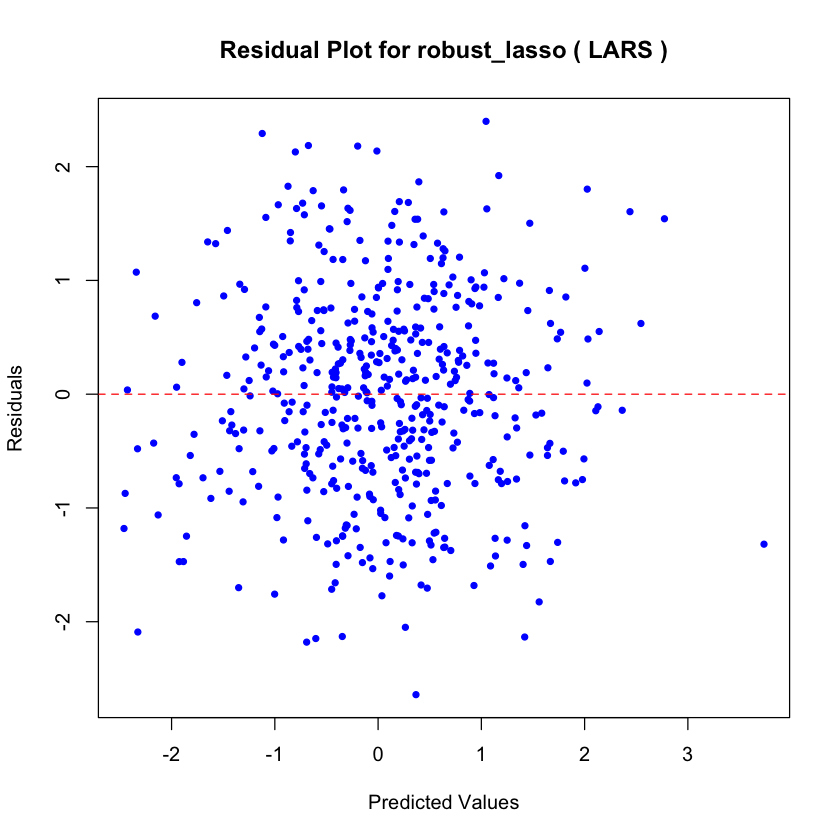


Running robust_lasso with method: SLA 
[1] "SLA"


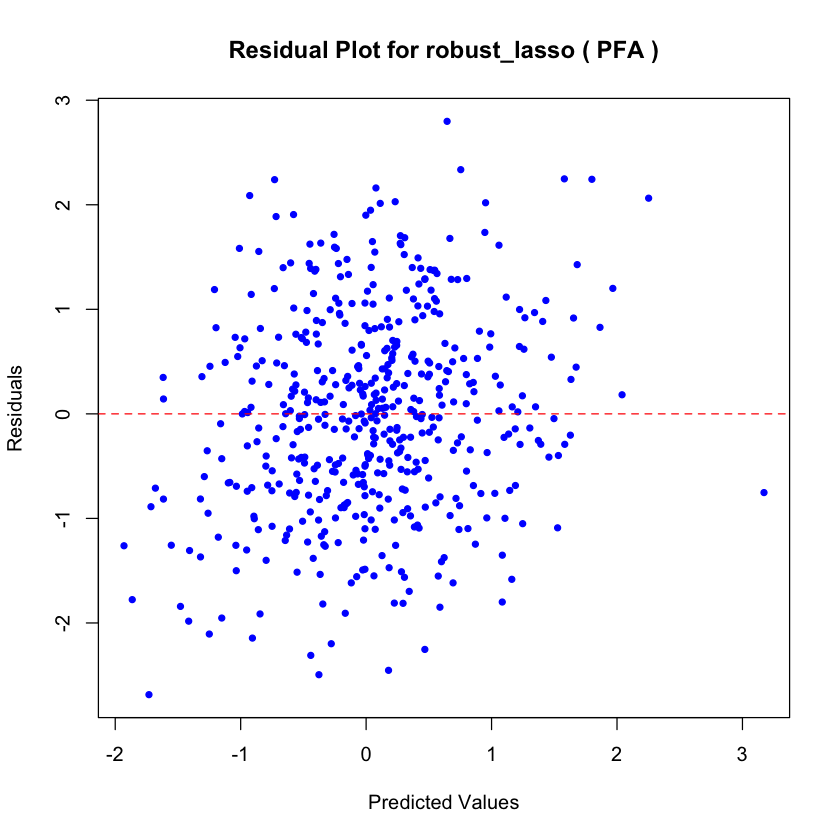


Running glmnet


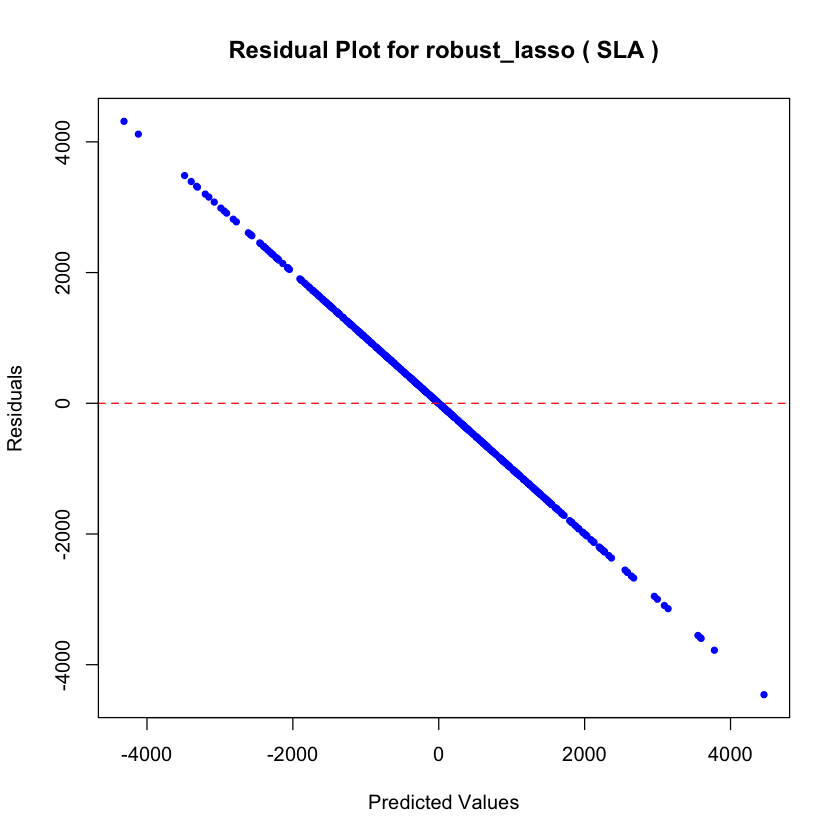

$auto
$auto$time
elapsed 
  0.007 

$auto$mse
[1] 0.9446945

$auto$r2
[1] 0.4501671


$CGDA
$CGDA$time
elapsed 
  0.001 

$CGDA$mse
[1] 0.9449868

$CGDA$r2
[1] 0.4499969


$ISTA
$ISTA$time
elapsed 
  0.001 

$ISTA$mse
[1] 0.9446945

$ISTA$r2
[1] 0.4501671


$FISTA
$FISTA$time
elapsed 
  0.003 

$FISTA$mse
[1] 0.9449869

$FISTA$r2
[1] 0.4499969


$LARS
$LARS$time
elapsed 
  0.039 

$LARS$mse
[1] 0.8208355

$LARS$r2
[1] 0.5222557


$PFA
$PFA$time
elapsed 
  0.002 

$PFA$mse
[1] 0.9295989

$PFA$r2
[1] 0.458953


$SLA
$SLA$time
elapsed 
  0.013 

$SLA$mse
[1] 1794841

$SLA$r2
[1] -1044636


$glmnet
$glmnet$time
elapsed 
  0.005 

$glmnet$mse
[1] 0.9295246

$glmnet$r2
[1] 0.4589963




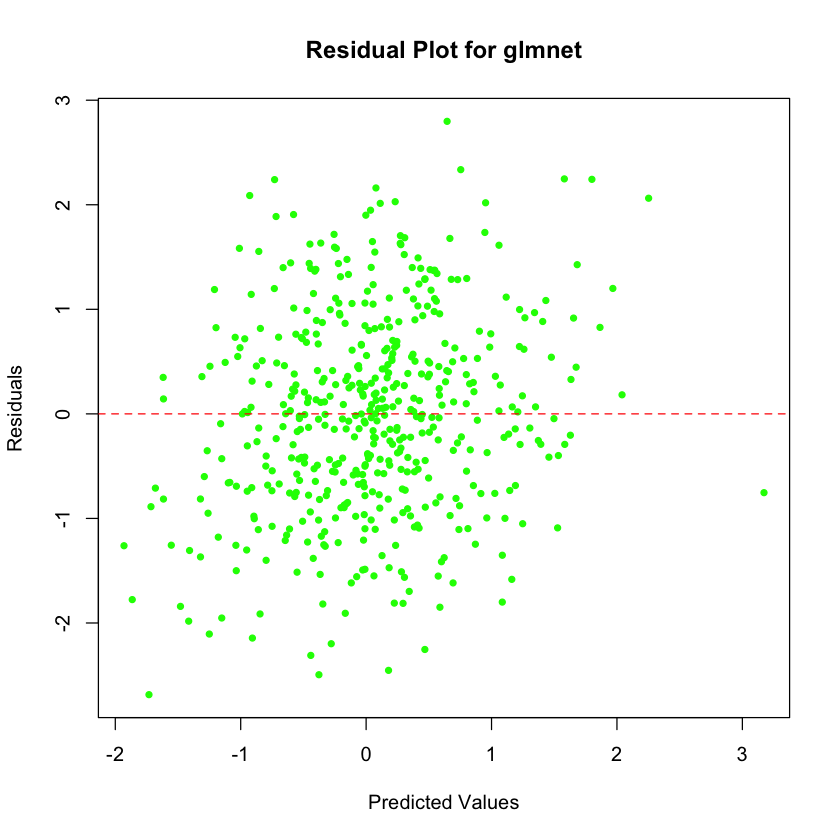

In [14]:
# feature_size，data_size，sparsity_level   
# test feature_size:low
results <- compare_lasso_methods(data_low_small_low$X, data_low_small_low$y, lambda=0.1)
# results <- compare_lasso_methods(data_low_small_medium$X, data_low_small_medium$y, lambda=0.1)

# results <- compare_lasso_methods(data_low_medium_low$X, data_low_medium_low$y, lambda=0.1)


# results <- compare_lasso_methods(data_low_large_low$X, data_low_large_low$y, lambda=0.1)


# results <- compare_lasso_methods(data_low_vlarge_low$X, data_low_vlarge_low$y, lambda=0.1)
